## Analiza danych

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

### Dane

### Dane pod analize

In [2]:
DATA_PATH = 'data/raw/listings.csv'
df = pd.read_csv(DATA_PATH)

columns_of_interests = [
    'price', 'accommodates', 'bedrooms', 'beds',
    'room_type', 'property_type', 'bathrooms',
    'maximum_nights', 'minimum_nights', 'neighbourhood_cleansed'
]
df_filtered = df[columns_of_interests].copy()
df_filtered.rename(columns={
    'neighbourhood_cleansed': 'neighbourhood_cleaned',
    'minimum_nights': 'min_nights',
    'maximum_nights': 'max_nights'
}, inplace=True)

df_filtered['price'] = (
    df_filtered['price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

### Dane pod modele

In [3]:
df_model = df_filtered.copy()
df_model.drop(columns=["max_nights"], inplace=True)
df_model.dropna(inplace=True)

### Analiza danych

#### Zależność liczby łóżek do liczby sypialni

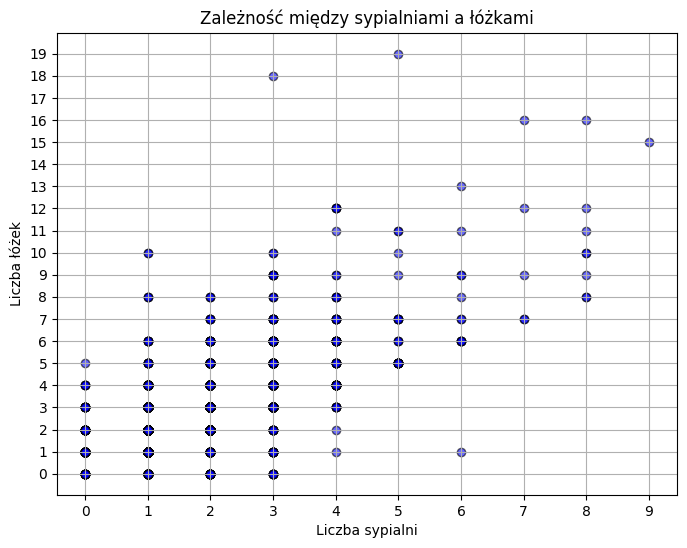

In [ ]:
df_plot = df_filtered[(df_filtered['bedrooms'] < 10) & (df_filtered['beds'] < 20)]

plt.figure(figsize=(8, 6))
plt.scatter(df_plot['bedrooms'], df_plot['beds'], alpha=0.6, edgecolors='black', color='blue')

plt.xlabel('Liczba sypialni')
plt.ylabel('Liczba łóżek')
plt.title('Zależność między sypialniami a łóżkami')
plt.grid(True)

plt.xticks(np.arange(0, df_plot['bedrooms'].max() + 1, 1))
plt.yticks(np.arange(0, df_plot['beds'].max() + 1, 1))

plt.show()

#### Liczba sypialni

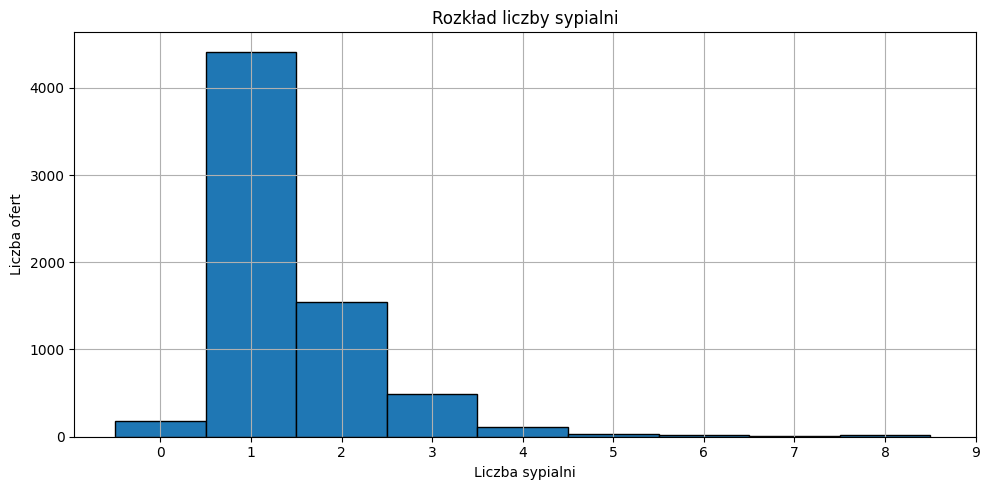

bedrooms
0.0      181
1.0     4415
2.0     1540
3.0      490
4.0      111
5.0       35
6.0       19
7.0       11
8.0       13
9.0        3
10.0       3
11.0       2
12.0       3
13.0       1
15.0       1
16.0       2
17.0       1
19.0       1
20.0       1
21.0       1
22.0       1
23.0       1
25.0       1
30.0       6
31.0       1
46.0       1
49.0       1
NaN     1974
Name: count, dtype: int64


In [ ]:
bedrooms_filtered = df_filtered['bedrooms'].dropna()
bins = np.arange(0, 10, 1)

plt.figure(figsize=(10, 5))
plt.hist(bedrooms_filtered, bins=bins, edgecolor='black', align='left')
plt.xticks(bins)
plt.xlabel('Liczba sypialni')
plt.ylabel('Liczba ofert')
plt.title('Rozkład liczby sypialni')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_filtered['bedrooms'].value_counts(dropna=False).sort_index())

#### Liczba łóżek

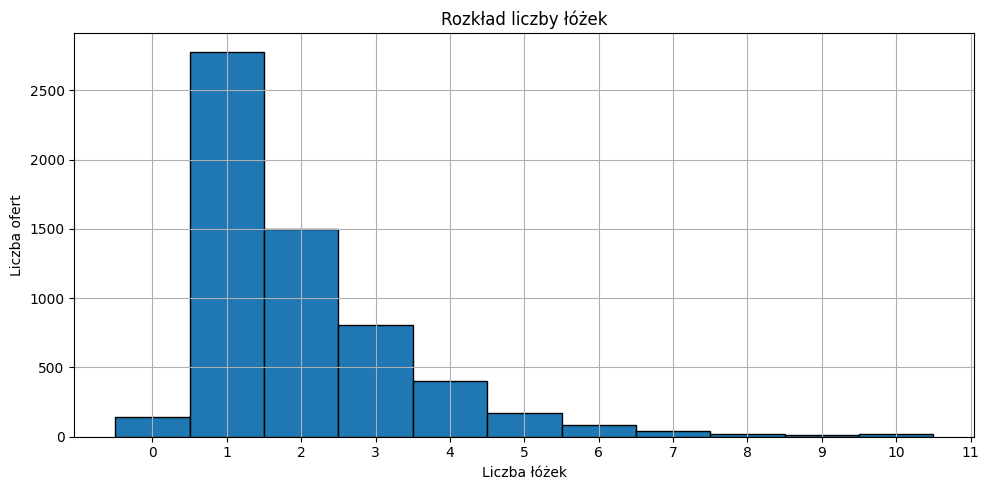

beds
0.0      143
1.0     2776
2.0     1499
3.0      804
4.0      402
5.0      173
6.0       84
7.0       40
8.0       19
9.0       15
10.0      11
11.0       6
12.0       8
13.0       1
14.0       1
15.0       1
16.0       2
18.0       1
19.0       2
20.0       2
21.0       1
28.0       1
32.0       1
34.0       1
38.0       1
50.0       5
NaN     2820
Name: count, dtype: int64


In [ ]:
beds_filtered = df_filtered['beds'].dropna()
bins = np.arange(0, 12, 1)

plt.figure(figsize=(10, 5))
plt.hist(beds_filtered, bins=bins, edgecolor='black', align='left')
plt.xticks(bins)
plt.xlabel('Liczba łóżek')
plt.ylabel('Liczba ofert')
plt.title('Rozkład liczby łóżek')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_filtered['beds'].value_counts(dropna=False).sort_index())


#### Zależność liczby możliwych osób a liczbą łóżek

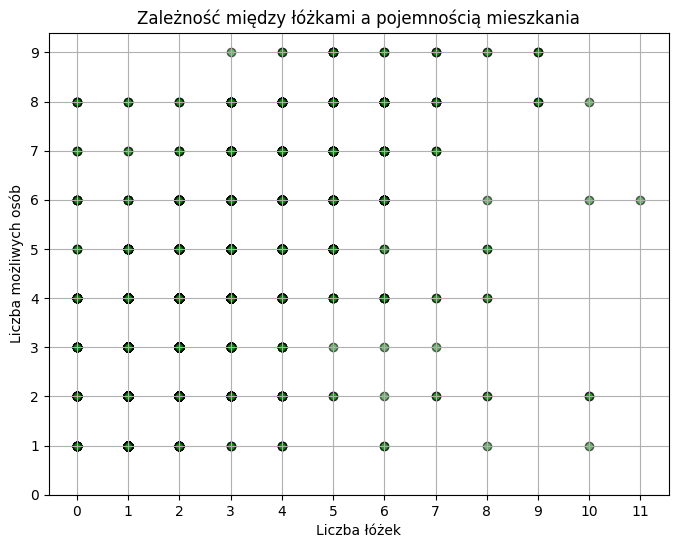

In [ ]:
df_plot = df_filtered[
    (df_filtered['accommodates'] < 10) &
    (df_filtered['beds'] < 20) &
    df_filtered['accommodates'].notnull() &
    df_filtered['beds'].notnull()
]

plt.figure(figsize=(8, 6))
plt.scatter(df_plot['beds'], df_plot['accommodates'], alpha=0.6, edgecolors='black', color='green')

plt.xlabel('Liczba łóżek')
plt.ylabel('Liczba możliwych osób')
plt.title('Zależność między łóżkami a pojemnością mieszkania')
plt.grid(True)
plt.xticks(np.arange(0, df_plot['beds'].max() + 1, 1))
plt.yticks(np.arange(0, df_plot['accommodates'].max() + 1, 1))
plt.show()

#### Jakie są wartości zmiennej określającą liczbę łazienek

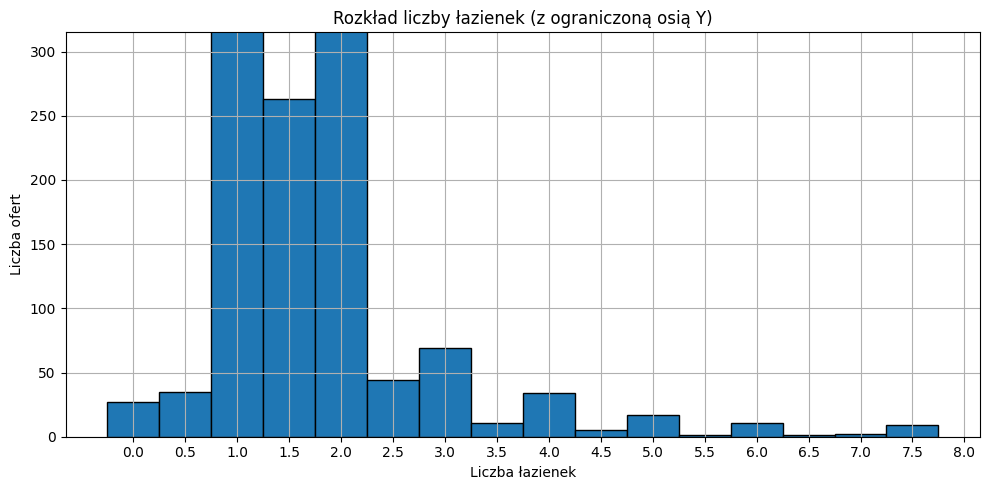

bathrooms
0.0       27
0.5       35
1.0     4982
1.5      263
2.0      568
2.5       44
3.0       69
3.5       11
4.0       34
4.5        5
5.0       17
5.5        1
6.0       11
6.5        1
7.0        2
7.5        1
8.0        8
9.0        2
10.0       2
11.0       1
14.0       1
19.0       1
20.0       3
25.0       1
NaN     2730
Name: count, dtype: int64


In [ ]:
bath_filtered = df_filtered['bathrooms'].dropna()
bins = np.arange(0, 8.5, 0.5)

plt.figure(figsize=(10, 5))
plt.hist(bath_filtered, bins=bins, edgecolor='black', align='left')
plt.xticks(bins)
plt.ylim(0, 315)
plt.xlabel('Liczba łazienek')
plt.ylabel('Liczba ofert')
plt.title('Rozkład liczby łazienek (z ograniczoną osią Y)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_filtered['bathrooms'].value_counts(dropna=False).sort_index())

#### Kolumna udogodnienia

In [ ]:
amenties = df['amenities'].dropna().apply(ast.literal_eval)

all_amenities = [a.strip() for sublist in amenties for a in sublist]
amenity_counts = Counter(all_amenities)

print('Liczba unikalnych udogodnień:', len(amenity_counts))
print('Top 10 najczęstszych:')
for amenity, count in amenity_counts.most_common(10):
    print(f"{amenity}: {count}")

Liczba unikalnych udogodnień: 2057
Top 10 najczęstszych:
Wifi: 6386
Kitchen: 5728
Hair dryer: 4926
TV: 4823
Iron: 4595
Hot water: 4575
Hangers: 4315
Air conditioning: 4150
Essentials: 4144
Dedicated workspace: 4094


#### Kolumna przedstawiająca dzielnice

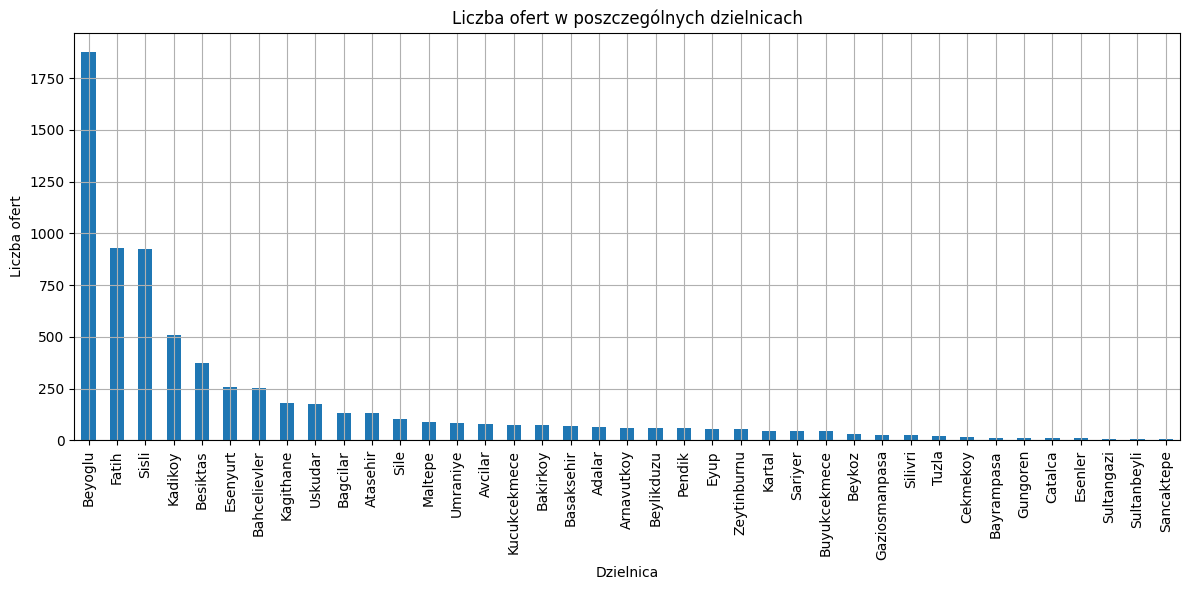

In [ ]:
counts = df['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.xlabel('Dzielnica')
plt.ylabel('Liczba ofert')
plt.title('Liczba ofert w poszczególnych dzielnicach')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Mediana 10 najdroższych dzielnic

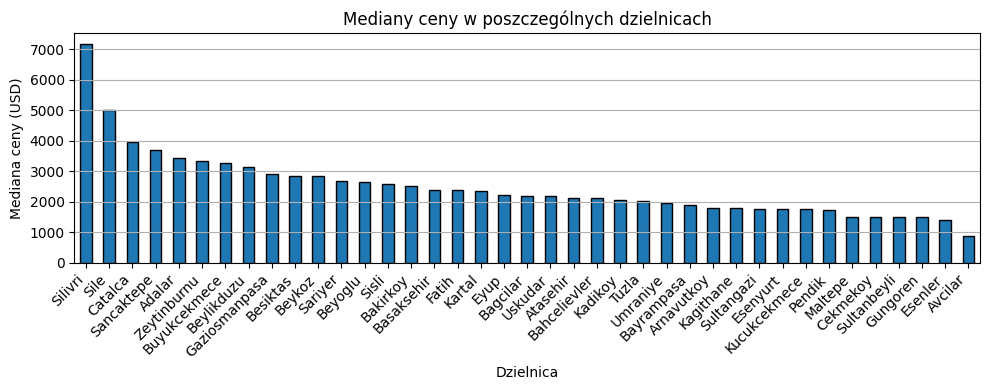

In [ ]:
median_price_by_district = (
    df_filtered
    .groupby('neighbourhood_cleaned')['price']
    .median()
    .sort_values(ascending=False)
    .round(2)
)

median_price_by_district.head(40).plot(kind='bar', figsize=(10, 4), edgecolor='black')
plt.title('Mediany ceny w poszczególnych dzielnicach')
plt.xlabel('Dzielnica')
plt.ylabel('Mediana ceny (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Mediana dla 10 najpopularniejszych dzielnic

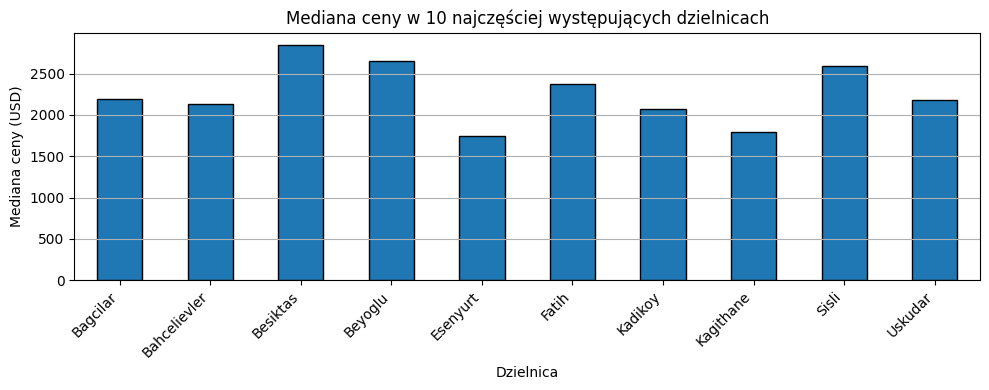

In [ ]:
top_districts_by_count = (
    df_filtered['neighbourhood_cleaned']
    .value_counts()
    .head(10)
    .index
)

median_top_districts = (
    df_filtered[df_filtered['neighbourhood_cleaned'].isin(top_districts_by_count)]
    .groupby('neighbourhood_cleaned')['price']
    .median()
    .round(2)
)

median_top_districts.plot(kind='bar', figsize=(10, 4), edgecolor='black')
plt.title('Mediana ceny w 10 najczęściej występujących dzielnicach')
plt.xlabel('Dzielnica')
plt.ylabel('Mediana ceny (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Obserwacje:
- popularniejsze są tańsze dzielnice, te luksowe są rzadziej wybierane, dlatego mamy mniej danych
- **wydaje się średnio możliwe aby ceny określały ceny za noc, bardziej to są ceny za miesiąc albo jeszcze jakieś inne albo mamy doczynienia z bardzo luksusowaymi lokalami** <- WAŻNA WĄTPLIWOŚĆ

#### Liczba osób, które zmieszczą się w mieszkaniu

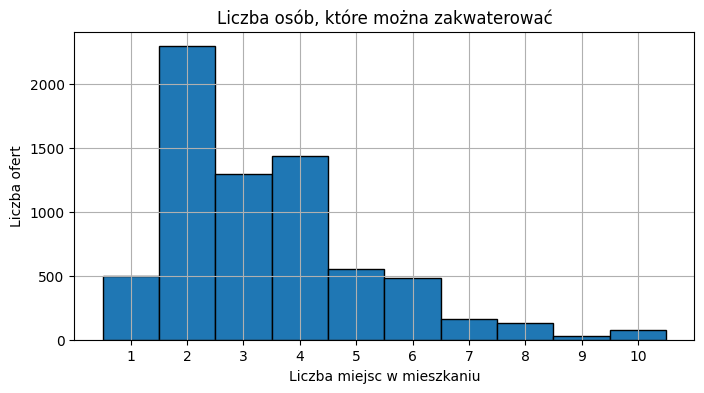

accommodates
1.0      495
2.0     2290
3.0     1291
4.0     1434
5.0      551
6.0      480
7.0      163
8.0      134
9.0       31
10.0      64
11.0      13
12.0      24
13.0       1
14.0       6
15.0       4
16.0      40
NaN     1799
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 4))
df_filtered['accommodates'].dropna().hist(bins=range(1, 12), edgecolor='black', align='left')
plt.title('Liczba osób, które można zakwaterować')
plt.xlabel('Liczba miejsc w mieszkaniu')
plt.ylabel('Liczba ofert')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

print(df_filtered['accommodates'].value_counts(dropna=False).sort_index())

#### Minimalna liczba nocy

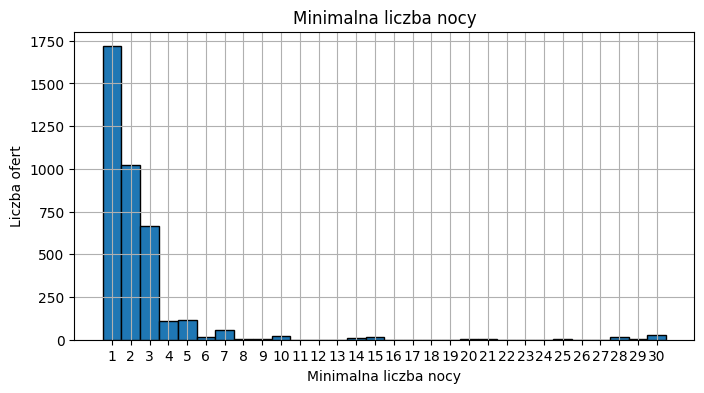

min_nights
1.0       1717
2.0       1023
3.0        666
4.0        107
5.0        116
6.0         16
7.0         56
8.0          2
9.0          3
10.0        23
11.0         1
14.0         8
15.0        18
20.0         6
21.0         3
25.0         4
27.0         1
28.0        14
29.0         3
30.0        30
40.0         1
43.0         1
45.0         2
50.0         1
60.0         4
88.0         1
90.0         2
100.0     2888
101.0      195
102.0        6
104.0        3
105.0        6
110.0        5
120.0       19
121.0        1
150.0        6
180.0       17
200.0        4
250.0        1
299.0        1
300.0        2
332.0        1
335.0        1
360.0        4
364.0        4
365.0       49
730.0        1
999.0        5
1000.0       1
NaN       1771
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 4))
df_filtered[df_filtered['min_nights'] <= 30]['min_nights'].dropna().hist(bins=range(1, 32), edgecolor='black', align='left')
plt.title('Minimalna liczba nocy')
plt.xlabel('Minimalna liczba nocy')
plt.ylabel('Liczba ofert')
plt.grid(True)
plt.xticks(range(1, 31))
plt.show()

print(df_filtered['min_nights'].value_counts(dropna=False).sort_index())

In [ ]:
not_integer_min = df_filtered['min_nights'].dropna().apply(lambda x: not float(x).is_integer())
print("Niecałkowite min_nights:", not_integer_min.sum())

Niecałkowite min_nights: 0


#### Maksymalna liczba nocy

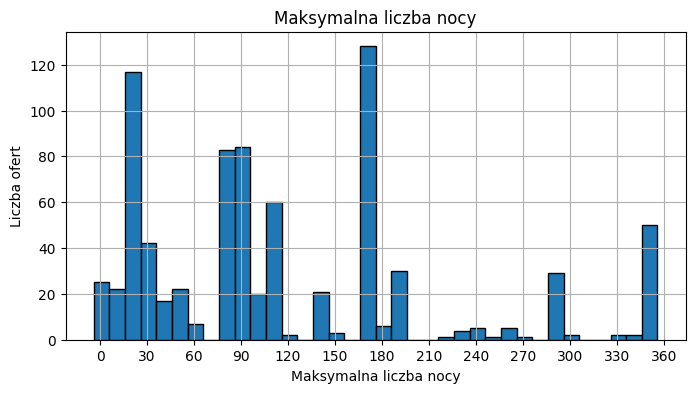

max_nights
1.0          3
2.0          1
3.0          2
5.0          5
6.0          5
          ... 
1113.0       1
1120.0       1
1124.0       3
1125.0    1195
NaN       1700
Name: count, Length: 102, dtype: int64


In [ ]:
plt.figure(figsize=(8, 4))
df_filtered[df_filtered['max_nights'] <= 365]['max_nights'].dropna().hist(bins=range(1, 366, 10), edgecolor='black', align='left')
plt.title('Maksymalna liczba nocy')
plt.xlabel('Maksymalna liczba nocy')
plt.ylabel('Liczba ofert')
plt.grid(True)
plt.xticks(range(0, 366, 30))
plt.show()

print(df_filtered['max_nights'].value_counts(dropna=False).sort_index())

In [ ]:
not_integer_max = df_filtered['max_nights'].dropna().apply(lambda x: not float(x).is_integer())
print("Niecałkowite max_nights:", not_integer_max.sum())

Niecałkowite max_nights: 0


#### Typ pokoju

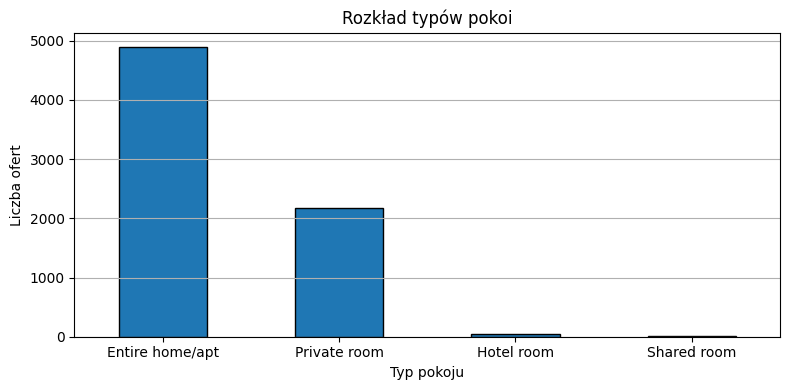

room_type
Entire home/apt    4890
Hotel room           40
Private room       2182
Shared room          17
NaN                1691
Name: count, dtype: int64


In [ ]:
room_counts = df_filtered['room_type'].value_counts()

plt.figure(figsize=(8, 4))
room_counts.plot(kind='bar', edgecolor='black')
plt.title('Rozkład typów pokoi')
plt.xlabel('Typ pokoju')
plt.ylabel('Liczba ofert')
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

room_counts

print(df_filtered['room_type'].value_counts(dropna=False).sort_index())


#### Typ nieruchomości

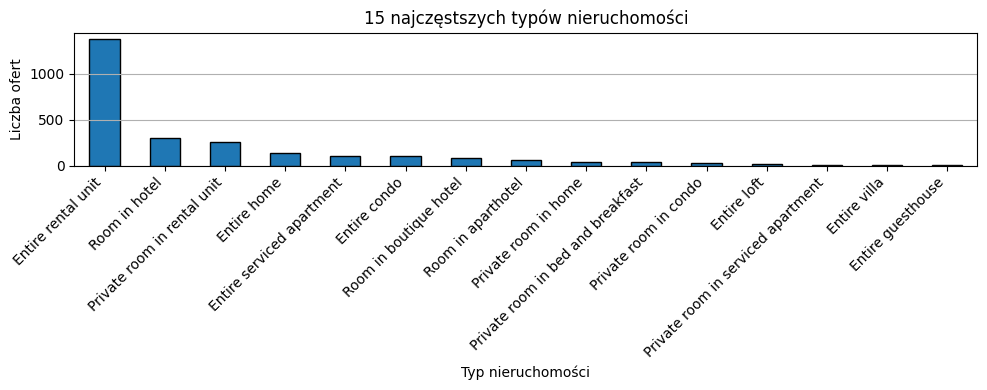

50
property_type
Barn                                     1
Boat                                     4
Camper/RV                                6
Casa particular                          2
Dome                                     1
Entire bungalow                          3
Entire cabin                             2
Entire condo                           102
Entire cottage                           1
Entire guest suite                       2
Entire guesthouse                        8
Entire home                            143
Entire loft                             15
Entire place                             3
Entire rental                            1
Entire rental unit                    1373
Entire serviced apartment              110
Entire townhouse                         3
Entire vacation home                     8
Entire villa                             8
Farm stay                                3
Private room                             2
Private room in bed and breakfast    

In [ ]:
property_counts = df_filtered['property_type'].value_counts().head(15)

plt.figure(figsize=(10, 4))
property_counts.plot(kind='bar', edgecolor='black')
plt.title('15 najczęstszych typów nieruchomości')
plt.xlabel('Typ nieruchomości')
plt.ylabel('Liczba ofert')
plt.grid(True, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(df_filtered['property_type'].dropna().unique().size)
print(df_filtered['property_type'].value_counts(dropna=False).sort_index())

#### Zmienna celu

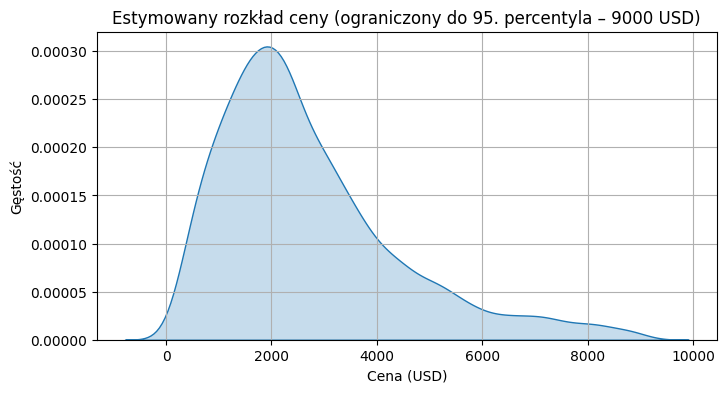

,price
0.50,2390.00
0.75,3755.75
0.90,6248.50
0.95,8876.50
0.99,21523.50


In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_filtered[df_filtered['price'] <= 9000]['price'], fill=True)
plt.title('Estymowany rozkład ceny (ograniczony do 95. percentyla - 9000 USD)')
plt.xlabel('Cena (USD)')
plt.ylabel('Gęstość')
plt.grid(True)
plt.show()

df_filtered['price'].quantile([0.5, 0.75, 0.9, 0.95, 0.99])

#### Statystyki opisowe zmiennych, które weźmiemy pod uwagę

In [ ]:
desc = df_filtered[['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'min_nights', 'max_nights']].describe()
desc.loc[['count', 'mean', 'std', 'min', 'max']].round(2)

,price,accommodates,bedrooms,beds,bathrooms,min_nights,max_nights
count,6026.00,7021.00,6846.00,6000.00,6090.00,7049.00,7120.00
mean,4084.28,3.52,1.53,2.10,1.22,50.71,482.63
std,31587.24,2.12,1.70,2.28,0.89,64.01,313.35
min,135.00,1.00,0.00,0.00,0.00,1.00,1.00
max,2344100.00,16.00,49.00,50.00,25.00,1000.00,1125.00


### Braki w danych

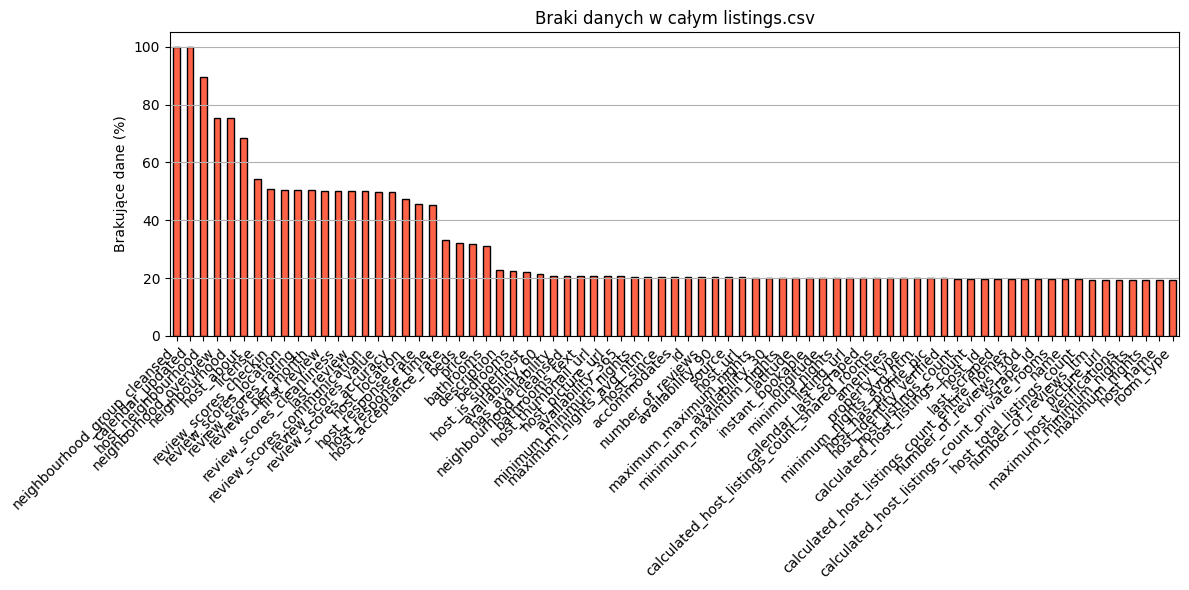

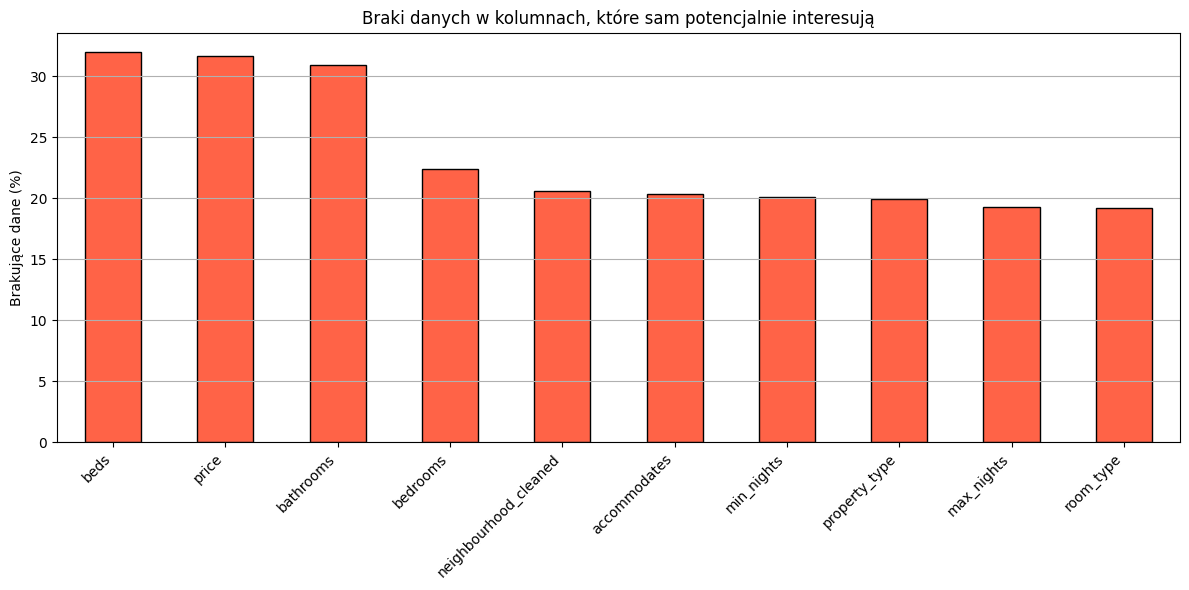

In [ ]:
def plot_missing_percentage(df, title):
    missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_percent = missing_percent[missing_percent > 0]

    plt.figure(figsize=(12, 6))
    missing_percent.plot(kind='bar', edgecolor='black', color='tomato')
    plt.title(title)
    plt.ylabel('Brakujące dane (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_missing_percentage(df, 'Braki danych w całym listings.csv')
plot_missing_percentage(df_filtered, 'Braki danych w kolumnach, które nas potencjalnie interesują')

### Mierzenie *korelacji*

##### Dla liczbowych atrybutów

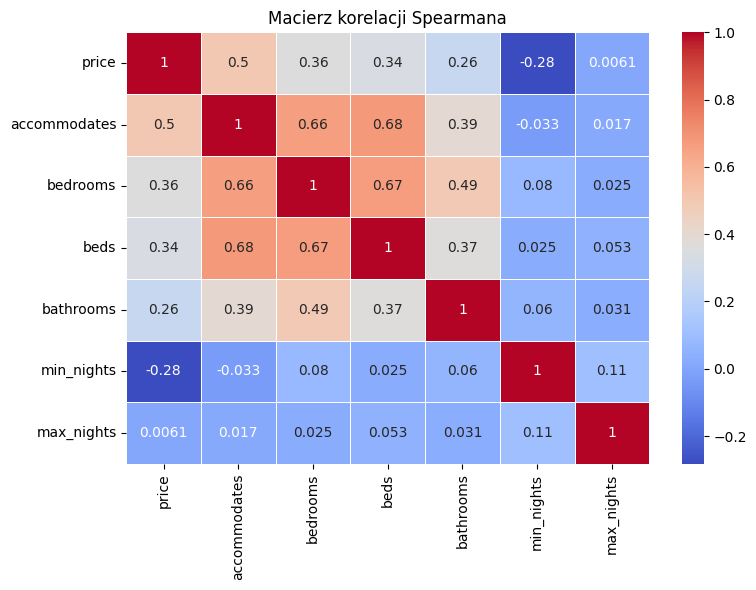

In [ ]:
numeric_cols = ['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'min_nights', 'max_nights']
correlation_matrix = df_filtered[numeric_cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji Spearmana')
plt.tight_layout()
plt.show()

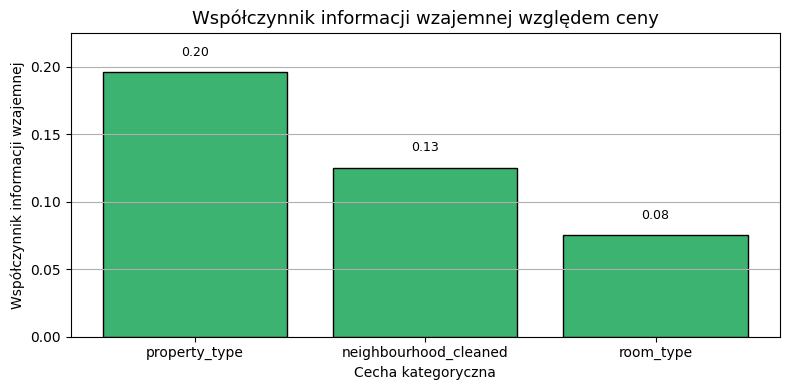

In [ ]:
df_temp = df_filtered.copy()
df_temp['price_binned'] = pd.qcut(df_temp['price'], q=20, duplicates='drop')

categorical_columns = ['room_type', 'property_type', 'neighbourhood_cleaned']
mi_scores = {}

for column in categorical_columns:
    contingency = pd.crosstab(df_temp[column].fillna('missing'), df_temp['price_binned'])
    mi = mutual_info_score(None, None, contingency=contingency.to_numpy())
    mi_scores[column] = mi

mi_series = pd.Series(mi_scores).sort_values(ascending=False).round(4)

plt.figure(figsize=(8, 4))
bars = plt.bar(mi_series.index, mi_series.values, color='mediumseagreen', edgecolor='black')

plt.title('Współczynnik informacji wzajemnej względem ceny', fontsize=13)
plt.ylabel('Współczynnik informacji wzajemnej')
plt.xlabel('Cecha kategoryczna')
plt.grid(axis='y')

plt.ylim(0, mi_series.max() * 1.15)

for rect in bars:
    value = rect.get_height()
    center = rect.get_x() + rect.get_width() / 2
    plt.text(center, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Modele

### Podział danych

In [26]:
X = df_model.drop(columns=['price'])
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# treningowe (80%): X_train, y_train
# testujący (20%): X_test, y_test

### Model naiwny

In [27]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Model naiwny: mae: {mae:.2f}, rmse: {rmse:.2f}')

Model naiwny: mae: 1869.46, rmse: 3472.63


### Inne modele

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

categorical_features = ['room_type', 'property_type', 'neighbourhood_cleaned']
numeric_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'min_nights']

### Model bazowy

In [28]:
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

model = Pipeline([
    ('prep', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Model bazowy: mae: {mae:.2f}, rmse:{rmse:.2f}')

Model bazowy: mae: 2405.73, rmse:3299.12


### Model zaawansowany

Przy modelu zaawansowanym oprócz po prostu nauczenia modelu nieliniowej regresji, próbowaliśmy przygotować odpowiednio dane, aby poprawić predykcję

#### Zabawa z pewnymi transformacjami

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

def select_top_categories(df, column, target, n_top_popular=5, n_top_expensive=5):
    counts = df[column].value_counts()
    medians = df.groupby(column)[target].median()

    top_popular = counts.nlargest(n_top_popular).index
    top_expensive = medians.nlargest(n_top_expensive).index

    top_categories = set(top_popular).union(set(top_expensive))
    return top_categories

class CustomNeighbourhoodMedianEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column='neighbourhood_cleaned', target='price',
                 n_top_popular=7, n_top_expensive=2):
        self.column = column
        self.target = target
        self.n_top_popular = n_top_popular
        self.n_top_expensive = n_top_expensive
        self._medians = None
        self._global_median = None
        self._top_categories = None

    def fit(self, X, y):
        df = X.copy()
        df[self.target] = y

        self._top_categories = select_top_categories(
            df, self.column, self.target,
            n_top_popular=self.n_top_popular,
            n_top_expensive=self.n_top_expensive
        )

        df[self.column] = df[self.column].apply(
            lambda x: x if x in self._top_categories else 'Other'
        )

        self._medians = df.groupby(self.column)[self.target].median()
        self._global_median = y.median()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].apply(
            lambda x: x if x in self._top_categories else 'Other'
        )

        X[f'{self.column}_encoded'] = X[self.column].map(self._medians)
        X[f'{self.column}_encoded'] = X[f'{self.column}_encoded'].fillna(self._global_median)

        return X.drop(columns=[self.column])

class PropertyTypeGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, column='property_type', top_n=6):
        self.column = column
        self.top_n = top_n
        self._top_categories = None

    def fit(self, X, y=None):
        counts = X[self.column].value_counts()
        self._top_categories = counts.nlargest(self.top_n).index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].apply(
            lambda x: x if x in self._top_categories else 'Other'
        )
        return X


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

categorical_features = ['room_type', 'property_type']
numeric_features = [
    'accommodates', 'bedrooms', 'beds', 'bathrooms',
    'min_nights', 'neighbourhood_cleaned_encoded'
]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

model = Pipeline([
    ('encode_district', CustomNeighbourhoodMedianEncoder()),
    ('group_property_type', PropertyTypeGrouper()),
    ('prep', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=RandomForestRegressor(
        n_estimators=258,
        max_depth=8,
        min_samples_split=2,
        random_state=123),
        func=np.log1p,
        inverse_func=np.expm1))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Model docelowy: mae: {mae:.2f}, rmse: {rmse:.2f}')

Model docelowy: mae: 1544.24, rmse: 2685.88


#### Strojenie hiperparametrów

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'regressor__n_estimators': randint(50, 300),
    'regressor__max_depth': [None] + list(range(5, 30)),
    'regressor__min_samples_split': randint(2, 15)
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=123
)

random_search.fit(X_train, y_train)
print("Najlepsze parametry:", random_search.best_params_)

Najlepsze parametry: {'regressor__max_depth': 8, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 258}


#### Próby ulepszenia modelu zaawansowanego

Na początku przetestowaliśmy pierwszą wersję bardziej zaawansowanego modelu — Random Forest — który dzięki swojej strukturze powinien być w stanie uchwycić nieliniowe zależności w danych.

Dla zmiennych kategorycznych zastosowaliśmy kodowanie one-hot, natomiast zmienne liczbowe nie były przeskalowywane. Początkowa wersja modelu osiągnęła wyniki:

`MAE: 1710.93, RMSE: 2672.90`

Następnie wprowadziliśmy lekkie przekształcenia danych — zastąpienie dzielnicy medianą ceny oraz ograniczenie liczby unikalnych wartości property_type. Spowodowało to niewielką poprawę wyników:

`MAE: 1660.18, RMSE: 2649.37`

Kolejnym krokiem było dostrojenie hiperparametrów modelu. Po tej zmianie uzyskaliśmy dalszą poprawę:

`MAE: 1627.11, RMSE: 2605.14`

Podczas implementacji i testowania mikroserwisu zauważyliśmy, że model potrafi zwracać ujemne ceny, mimo że w zbiorze treningowym nie występowały wartości poniżej zera. Aby temu zapobiec, zdecydowaliśmy się zastosować logarytmowanie zmiennej celu (z funkcją odwrotną przy predykcji), co wydawało nam się, że poprawi predykcję.

Po wprowadzeniu logarytmowania zmiennej celu uzyskaliśmy wyniki:

`MAE: 1544.24, RMSE: 2685.8`
